# **EDA and preprocessing of california housing dataset** 
## **-by AFZAL**  

# Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import cut as pd_cut
from sklearn.datasets import fetch_california_housing

import matplotlib.style as style
style.use("seaborn-darkgrid")

# Importing data

In [2]:
cali=fetch_california_housing(as_frame=True)
df=cali.frame

# About dataset:

In [3]:
print(cali.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

# Basic info

In [4]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### *There are no missing values*

In [6]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# Feature Engineering

### converting to categorical ordinal

In [7]:
df['income_cat'] = pd_cut(
    df["MedInc"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5]
)

# Univariate analysis

In [8]:
#####################################
'''IMPORTING FROM MY CUSTOM MODULE'''
#####################################
from quick_EDA import analysis_quant, analysis_cate, handle_outliers, correlation, multiplot

### Categorical features

				ANALYSIS OF: income_cat 

No. of UNIQUE values:
3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64



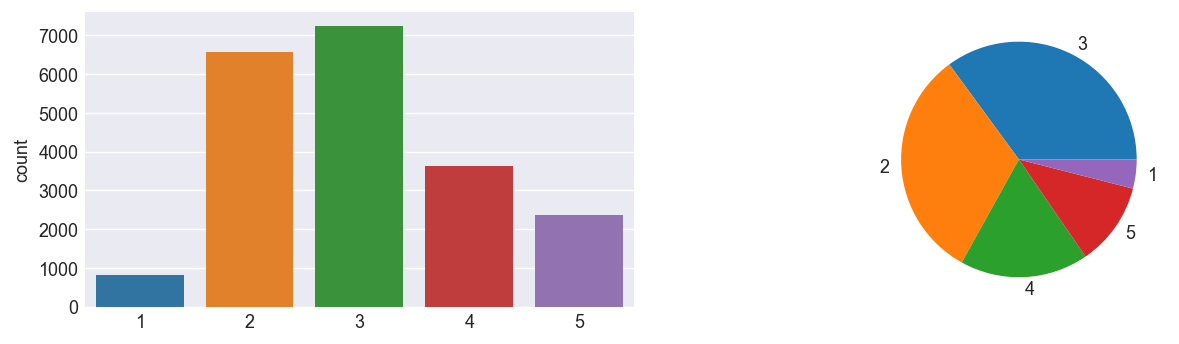

_____________________________________________________________________________________________________________________


In [9]:
columns_cate=['income_cat']
analysis_cate(df, columns_cate, figsize=(12,3), dpi=130)

### Quantative features

				ANALYSIS OF: MedInc 

5 point summary for: MedInc
       MedInc
min   0.49990
25%   2.56340
50%   3.53480
75%   4.74325
max  15.00010
---------------------------------
OUTLIERS in MedInc via Z score

Outlier limits:
lower limit: -1.8286560808176446 
upper limit: 9.569998086631598

Total outliers: 345
       outliers   Z-score
5738     9.5823  3.006475
1541     9.5862  3.008528
18505    9.5908  3.010950
14718    9.6023  3.017003
3542     9.6047  3.018266 
.
.
       outliers   Z-score
4606    15.0001  5.858286
6399    15.0001  5.858286
4604    15.0001  5.858286
17107   15.0001  5.858286
6391    15.0001  5.858286
---------------------------------
OUTLIERS in MedInc via IQR

Outlier limits:
lower limit: -0.7063750000000004 
upper limit: 8.013024999999999

Total outliers: 681
       MedInc
9019   8.0137
9026   8.0144
18088  8.0158
5355   8.0239
8877   8.0257 
.
.
        MedInc
1566   15.0001
6736   15.0001
6727   15.0001
8853   15.0001
17858  15.0001
---------------------------------


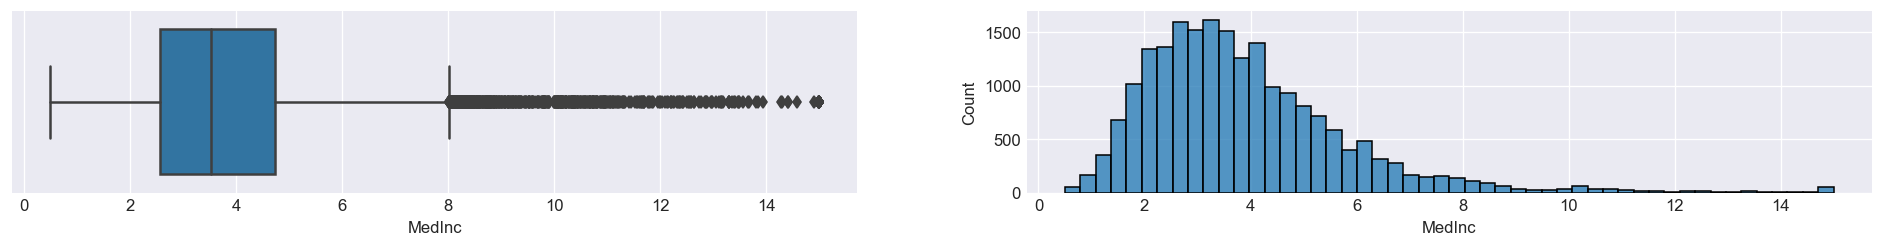

___________________________________________________________________________________________________________
				ANALYSIS OF: HouseAge 

5 point summary for: HouseAge
     HouseAge
min       1.0
25%      18.0
50%      29.0
75%      37.0
max      52.0
---------------------------------
OUTLIERS in HouseAge via Z score

Outlier limits:
lower limit: -9.11627174306529 
upper limit: 66.39524461128235

Total outliers: 0
---------------------------------
OUTLIERS in HouseAge via IQR

Outlier limits:
lower limit: -10.5 
upper limit: 65.5

Total outliers: 0
---------------------------------


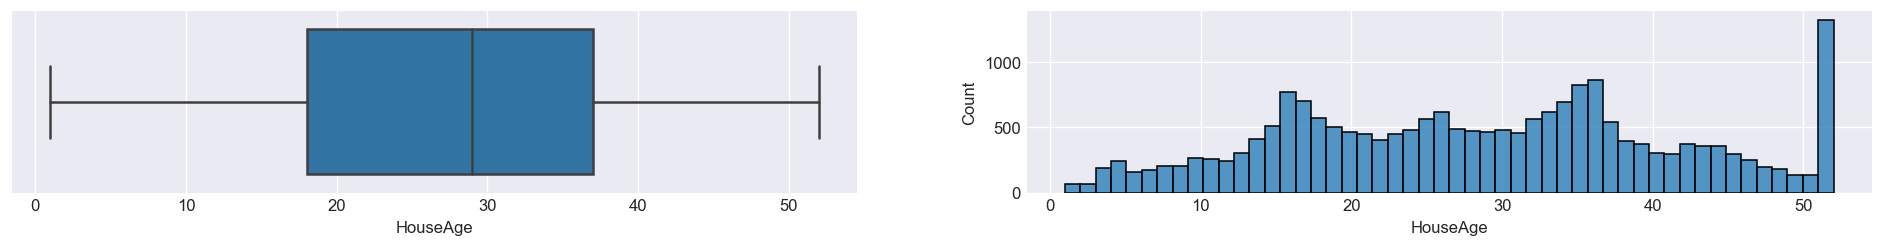

___________________________________________________________________________________________________________
				ANALYSIS OF: AveRooms 

5 point summary for: AveRooms
       AveRooms
min    0.846154
25%    4.440716
50%    5.229129
75%    6.052381
max  141.909091
---------------------------------
OUTLIERS in AveRooms via Z score

Outlier limits:
lower limit: -1.9933398648101726 
upper limit: 12.851339349190924

Total outliers: 133
        outliers   Z-score
13978  12.901887  3.020431
12396  12.910486  3.023906
1879   13.104167  3.102189
11867  13.258824  3.164699
12371  13.408082  3.225027 
.
.
         outliers    Z-score
11862   59.875000  22.006269
1913    61.812500  22.789378
12447   62.422222  23.035818
1979   132.533333  51.373694
1914   141.909091  55.163236
---------------------------------
OUTLIERS in AveRooms via IQR

Outlier limits:
lower limit: 2.023219161170969 
upper limit: 8.469878027106942

Total outliers: 511
       AveRooms
5916   0.846154
8219   0.888889
3126   1.00000

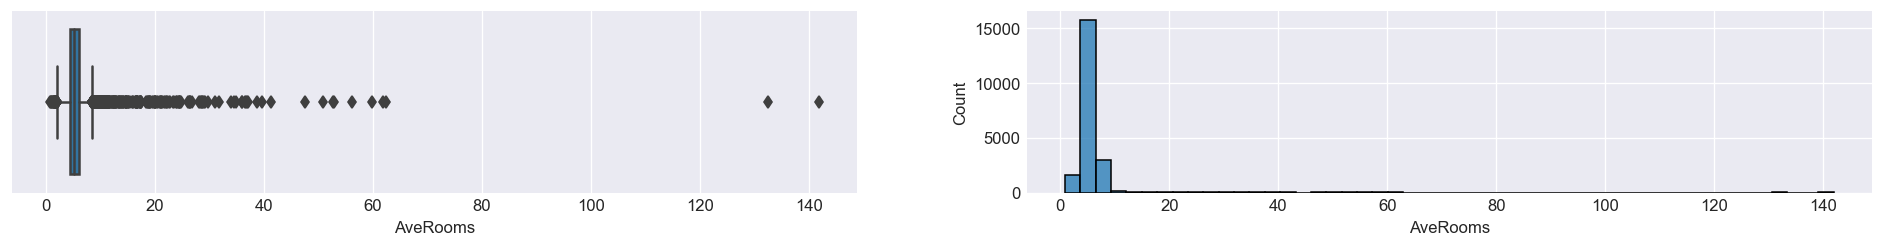

___________________________________________________________________________________________________________
				ANALYSIS OF: AveBedrms 

5 point summary for: AveBedrms
     AveBedrms
min   0.333333
25%   1.006079
50%   1.048780
75%   1.099526
max  34.066667
---------------------------------
OUTLIERS in AveBedrms via Z score

Outlier limits:
lower limit: -0.32502297916702627 
upper limit: 2.518373278379442

Total outliers: 145
       outliers   Z-score
12305  2.536385  3.038007
19800  2.561404  3.090800
1925   2.562500  3.093114
19789  2.565217  3.098848
1235   2.588235  3.147420 
.
.
        outliers    Z-score
9676   11.410714  21.764196
12447  14.111111  27.462446
11862  15.312500  29.997560
1914   25.636364  51.782487
1979   34.066667  69.571713
---------------------------------
OUTLIERS in AveBedrms via IQR

Outlier limits:
lower limit: 0.8659085155701288 
upper limit: 1.2396965968190603

Total outliers: 1424
       AveBedrms
20248   0.333333
13606   0.375000
12649   0.444444
12138

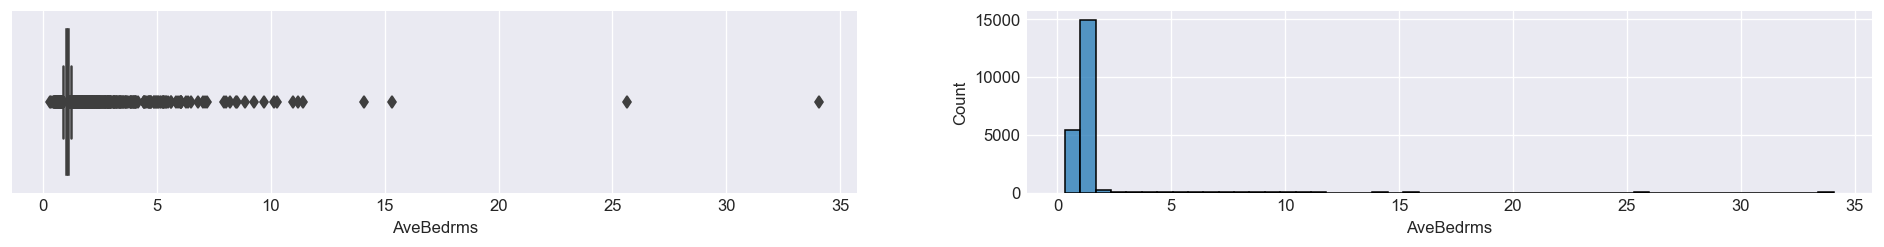

___________________________________________________________________________________________________________
				ANALYSIS OF: Population 

5 point summary for: Population
     Population
min         3.0
25%       787.0
50%      1166.0
75%      1725.0
max     35682.0
---------------------------------
OUTLIERS in Population via Z score

Outlier limits:
lower limit: -1971.8273190867983 
upper limit: 4822.780807458891

Total outliers: 342
       outliers   Z-score
3829     4826.0  3.002843
19421    4827.0  3.003726
4264     4828.0  3.004609
12658    4828.0  3.004609
20333    4830.0  3.006375 
.
.
       outliers    Z-score
6057    15507.0  12.434733
10309   16122.0  12.977811
13139   16305.0  13.139410
9880    28566.0  23.966524
15360   35682.0  30.250330
---------------------------------
OUTLIERS in Population via IQR

Outlier limits:
lower limit: -620.0 
upper limit: 3132.0

Total outliers: 1196
       Population
12454      3134.0
3419       3134.0
15883      3134.0
5329       3136.0
1223

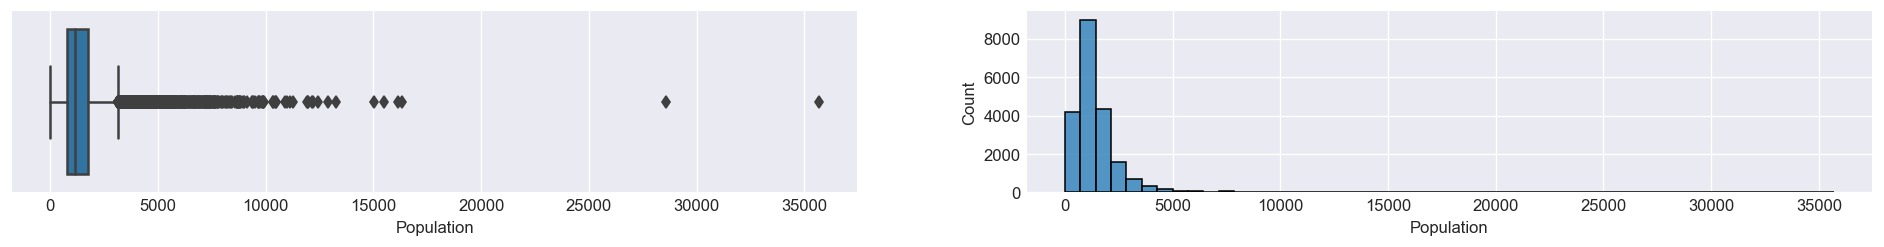

___________________________________________________________________________________________________________
				ANALYSIS OF: AveOccup 

5 point summary for: AveOccup
        AveOccup
min     0.692308
25%     2.429741
50%     2.818116
75%     3.282261
max  1243.333333
---------------------------------
OUTLIERS in AveOccup via Z score

Outlier limits:
lower limit: -28.086738717948283 
upper limit: 34.228049036821034

Total outliers: 8
          outliers     Z-score
8874     41.214286    3.672672
16420    51.400000    4.653407
12104    63.750000    5.842531
9172     83.171429    7.712530
13034   230.172414   21.866568
16669   502.461538   48.084017
3364    599.714286   57.448030
19006  1243.333333  119.419103
---------------------------------
OUTLIERS in AveOccup via IQR

Outlier limits:
lower limit: 1.1509614824735064 
upper limit: 4.5610405893536905

Total outliers: 711
       AveOccup
11849  0.692308
5342   0.750000
19522  0.970588
19427  1.060606
4623   1.066176 
.
.
          AveOccu

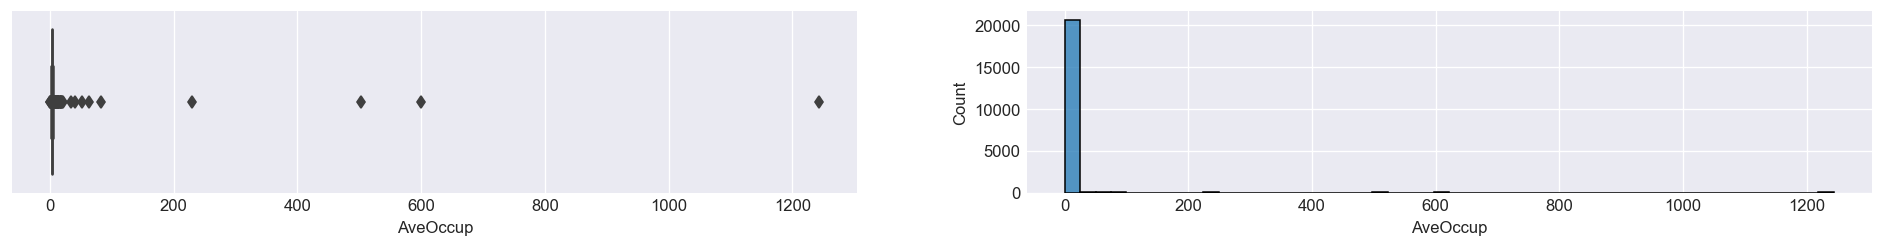

___________________________________________________________________________________________________________
				ANALYSIS OF: Latitude 

5 point summary for: Latitude
     Latitude
min     32.54
25%     33.93
50%     34.26
75%     37.71
max     41.95
---------------------------------
OUTLIERS in Latitude via Z score

Outlier limits:
lower limit: 29.22415947271608 
upper limit: 42.03956339550098

Total outliers: 0
---------------------------------
OUTLIERS in Latitude via IQR

Outlier limits:
lower limit: 28.259999999999998 
upper limit: 43.38

Total outliers: 0
---------------------------------


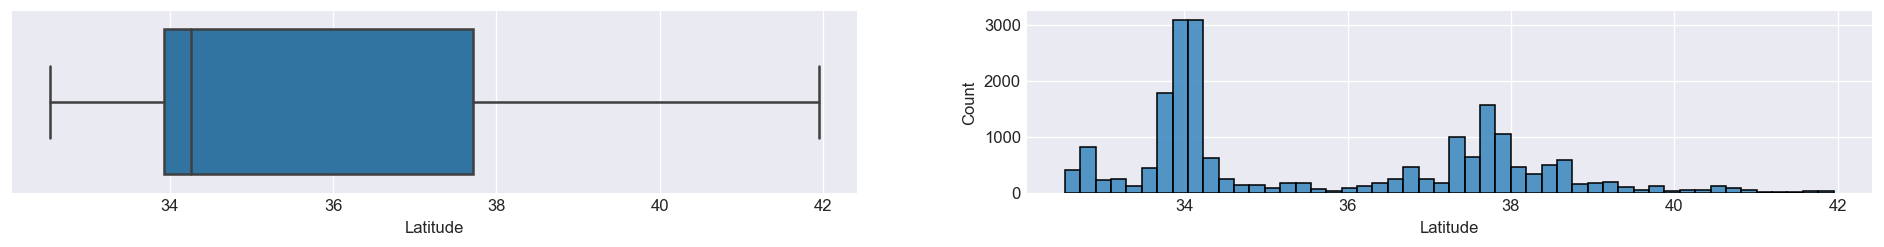

___________________________________________________________________________________________________________
				ANALYSIS OF: Longitude 

5 point summary for: Longitude
     Longitude
min    -124.35
25%    -121.80
50%    -118.49
75%    -118.01
max    -114.31
---------------------------------
OUTLIERS in Longitude via Z score

Outlier limits:
lower limit: -125.58015402060525 
upper limit: -113.5592548941234

Total outliers: 0
---------------------------------
OUTLIERS in Longitude via IQR

Outlier limits:
lower limit: -127.48499999999999 
upper limit: -112.32500000000002

Total outliers: 0
---------------------------------


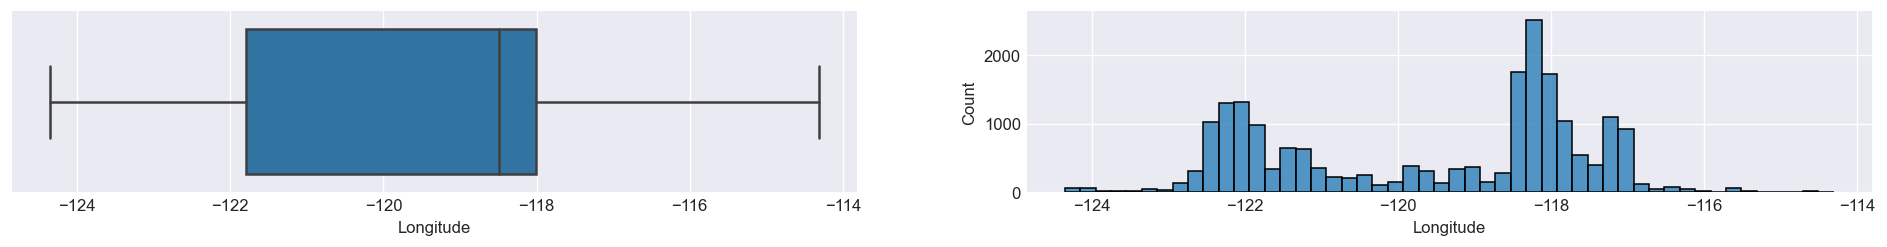

___________________________________________________________________________________________________________
				ANALYSIS OF: MedHouseVal 

5 point summary for: MedHouseVal
     MedHouseVal
min      0.14999
25%      1.19600
50%      1.79700
75%      2.64725
max      5.00001
---------------------------------
OUTLIERS in MedHouseVal via Z score

Outlier limits:
lower limit: -1.393226443034529 
upper limit: 5.530342781212823

Total outliers: 0
---------------------------------
OUTLIERS in MedHouseVal via IQR

Outlier limits:
lower limit: -0.9808749999999995 
upper limit: 4.824124999999999

Total outliers: 1071
       MedHouseVal
14817        4.827
10734        4.829
4018         4.831
140          4.833
10405        4.833 
.
.
       MedHouseVal
8761       5.00001
8764       5.00001
8766       5.00001
8638       5.00001
20443      5.00001
---------------------------------


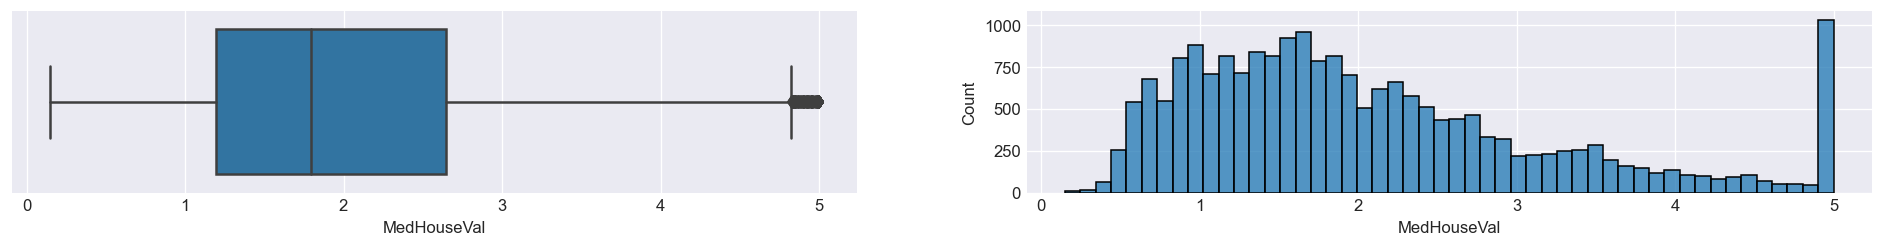

___________________________________________________________________________________________________________


In [10]:
analysis_quant(df, df.drop(columns='income_cat', axis=1).columns, figsize=(20,2), dpi=120)

    MedInc is right skewed
    AveRooms, AveBedrms, Population, AveOccup have a few outliers.

### ***There is a weird bump in MedHouseVal***

### Outlier handling

    Medinc seems to be right skewed so lets apply log transform on it to make it normally distributed

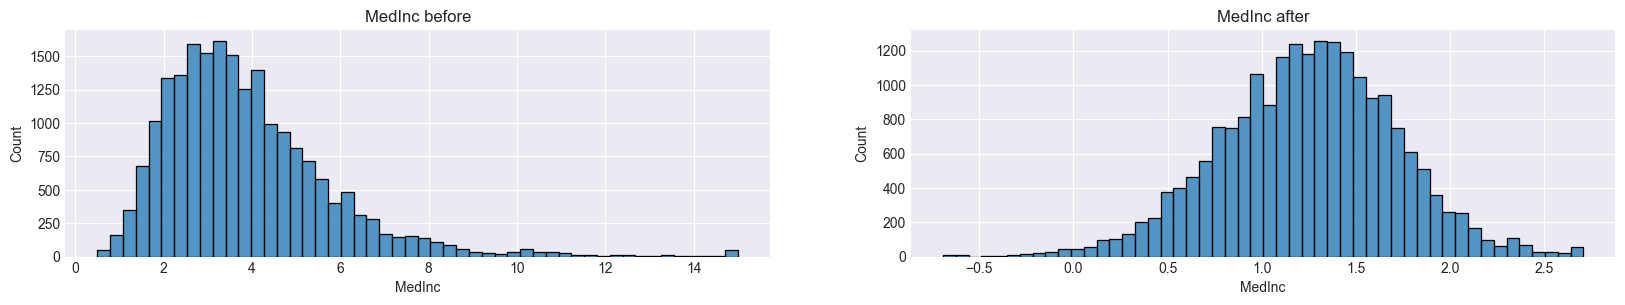

In [11]:
fig,ax=plt.subplots(1,2, figsize=(20,3), dpi=100)
sns.histplot(data=df.MedInc, bins=50, ax=ax[0])
ax[0].set_title('MedInc before')

# applying log transform
df.MedInc = np.log( df.MedInc )

sns.histplot(data=df.MedInc, bins=50, ax=ax[1])
ax[1].set_title('MedInc after')
plt.show()

    There are some resorts and hotels included in this hotel and hence high values for AveRooms
    lets compress those values to a resonable value like 15

Compressed the following outliers in AveRooms:

Total outliers: 109
        AveRooms
9431   15.015152
11715  15.021164
11865  15.115385
10078  15.272727
11831  15.511278 
.
.
         AveRooms
11862   59.875000
1913    61.812500
12447   62.422222
1979   132.533333
1914   141.909091


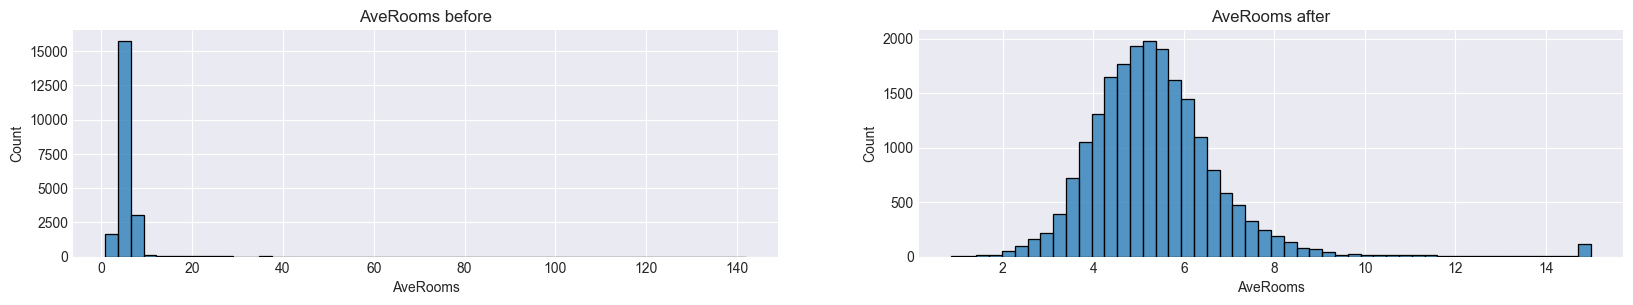

_____________________________________________________________________________________________________________________


In [12]:
handle_outliers(df, 'AveRooms', using='custom', custom_intervals=(None,15))

    There are some resorts and hotels included in this hotel and hence high values for AveBedrms
    lets compress those values to a resonable value like 3

Compressed the following outliers in AveBedrms:

Total outliers: 107
       AveBedrms
11717   3.012500
13963   3.078652
13911   3.099338
19362   3.116208
1911    3.116279 
.
.
       AveBedrms
9676   11.410714
12447  14.111111
11862  15.312500
1914   25.636364
1979   34.066667


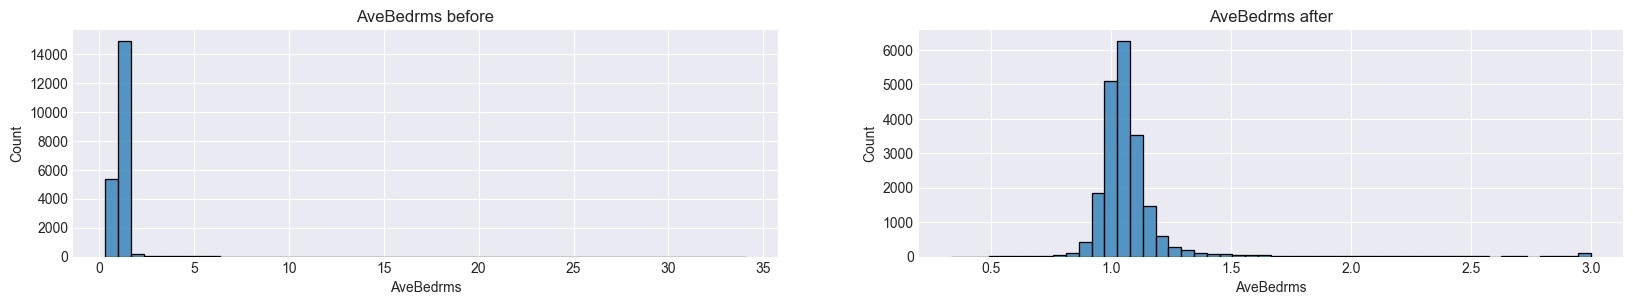

_____________________________________________________________________________________________________________________


In [13]:
handle_outliers(df, 'AveBedrms', using='custom', custom_intervals=(None,3))

    Compressing outliers in Populations to 6000

Compressed the following outliers in Population:

Total outliers: 192
       Population
13132      6002.0
9693       6012.0
17754      6034.0
17761      6047.0
12954      6068.0 
.
.
       Population
6057      15507.0
10309     16122.0
13139     16305.0
9880      28566.0
15360     35682.0


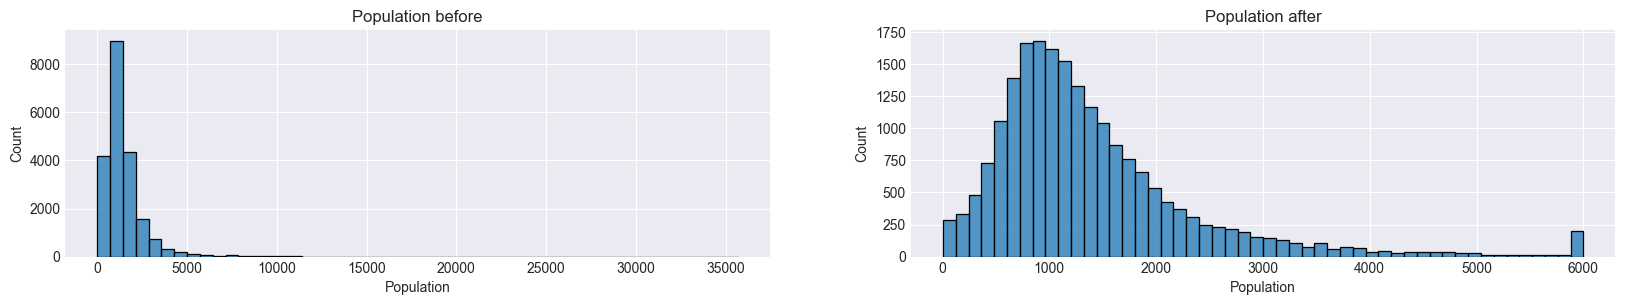

_____________________________________________________________________________________________________________________


In [14]:
handle_outliers(df, 'Population', using='custom', custom_intervals=(None,6000))

    Compressing outliers in AveOccup to 10 since above 10 seems to be due to hotels and resorts

Compressed the following outliers in AveOccup:

Total outliers: 37
        AveOccup
17891  10.153846
91     10.272727
14804  10.980000
1067   11.295918
2899   11.634146 
.
.
          AveOccup
9172     83.171429
13034   230.172414
16669   502.461538
3364    599.714286
19006  1243.333333


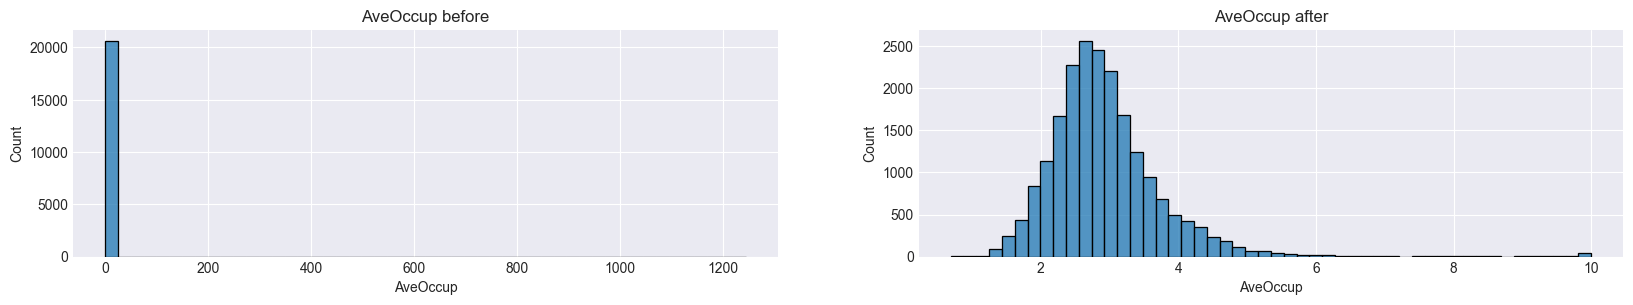

_____________________________________________________________________________________________________________________


In [15]:
handle_outliers(df, 'AveOccup', using='custom', custom_intervals=(None,10))

# Bivariate analysis

### Correlation

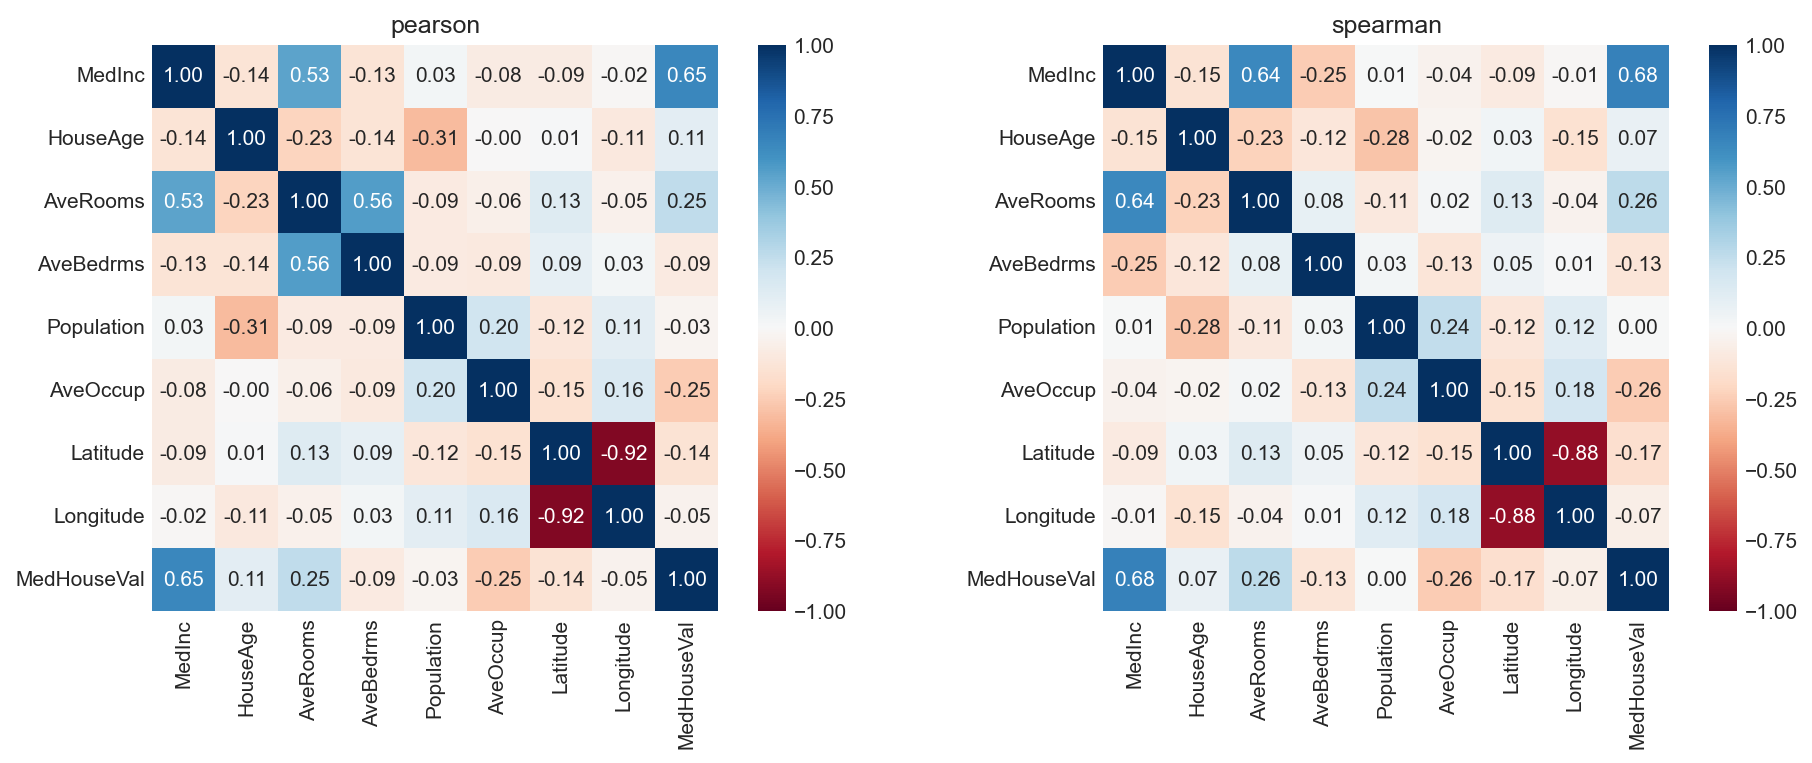

In [16]:
correlation(df, figsize=(15,5), dpi=150)

### ***Looks like latitude and longitude have high correlation***

### Lets see the pairwise scatter plots to see any interesting patterns

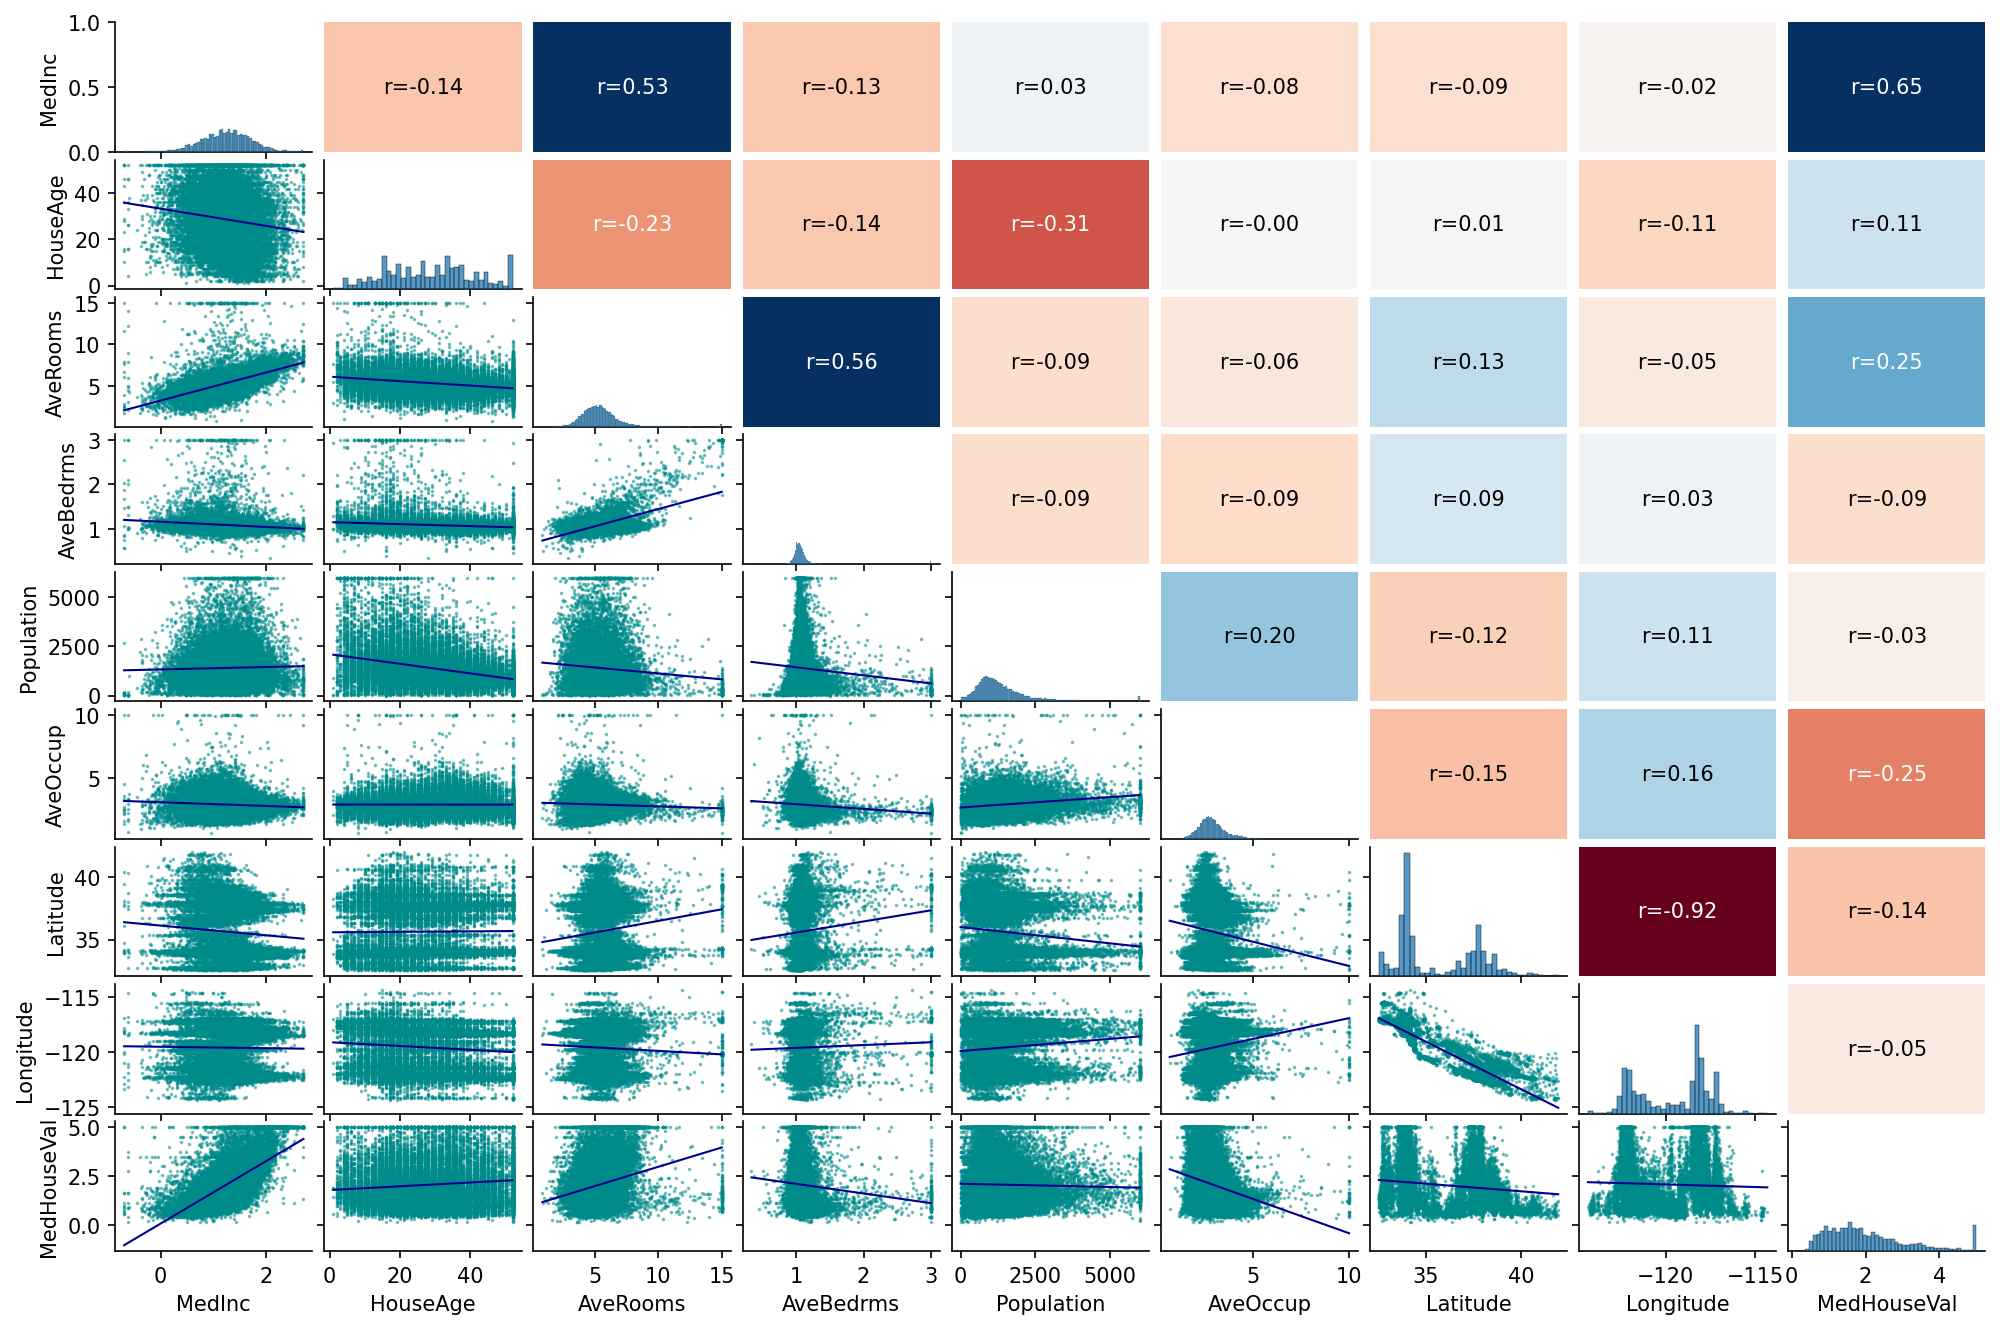

In [17]:
multiplot(df)

### ***Looks like latitude and longitude have some interesting pattern***

### Lets see the effect of binned MedInc on MedHouseVal 

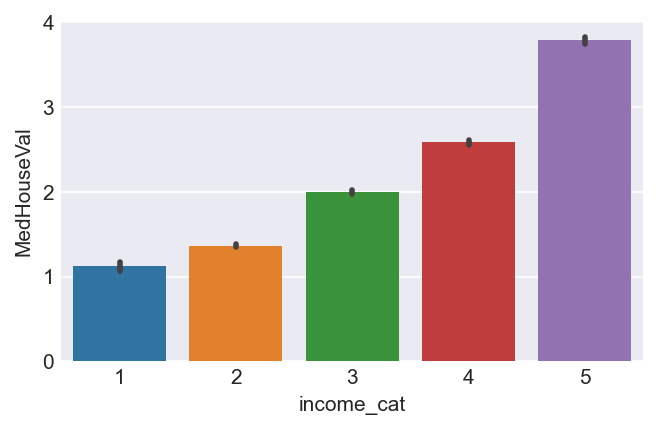

In [18]:
sns.catplot(
    data=df,
    x='income_cat',
    y='MedHouseVal',
    kind='bar', 
    aspect=1.5, height=3
).fig.dpi=150
plt.show()

### Looks like there is a positive correlation with very low ci and hence high confidence. 
### ***Higher MedInc clearly implies higher MedHouseVal***

# Multivariate Analysis

### Lets see how the MedHouseVal is affected by the latitude and longitude

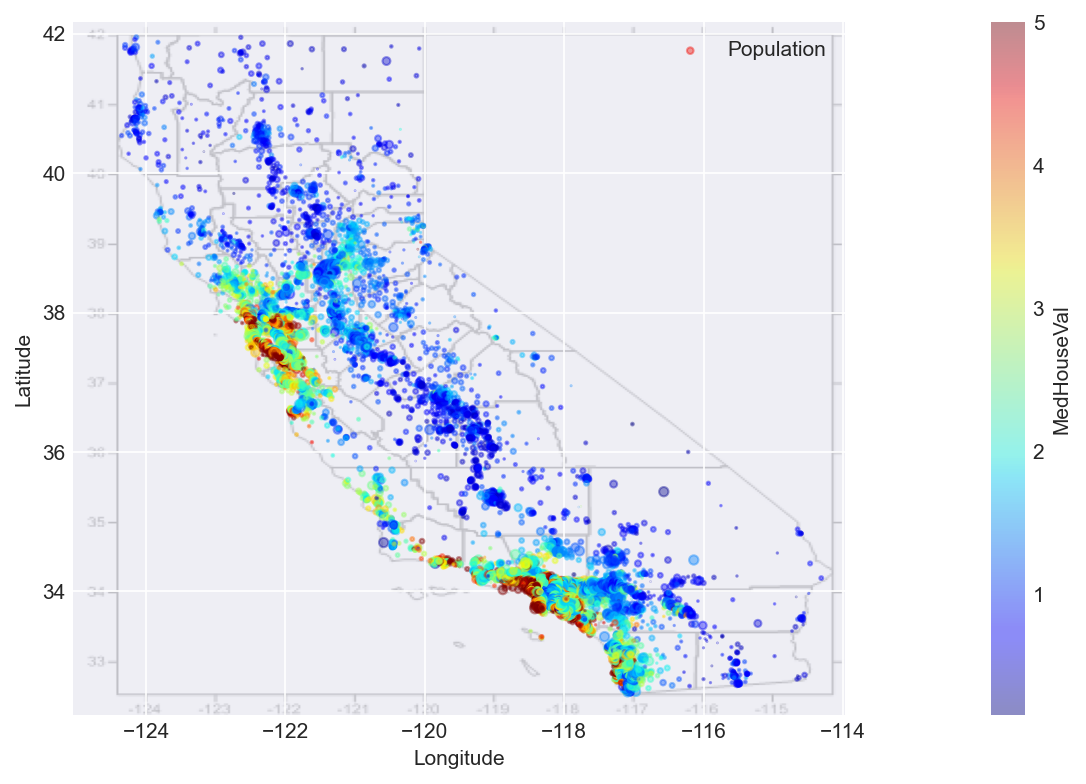

In [19]:
extent=[-125.05, -113.964, 32.22, 42.165]

fig,ax=plt.subplots(figsize=(25,6), dpi=150)
ax.imshow(plt.imread('california.png'),extent=extent, alpha=0.2)

df.plot(
    kind="scatter",
    x="Longitude",
    y="Latitude",
    s=df["Population"]/300,
    label="Population",
    c="MedHouseVal",
    colorbar=True, alpha=0.4, ax=ax, cmap=plt.get_cmap("jet"), 
)

plt.legend()
plt.show()


    The lower left part of the graph is the ocean. 
### ***Looks like houses near to the coastline are costlier as compared to others***